# TFM - COMPARISON OF UNIT BIDS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import datetime, timedelta

from TFM_PredCurve_Tools import data_date_hour_info, convert_to_df_curve, days_25h_23h
from TFM_PredCurve_Tools import data_report, data_report_total, missing_dates, bid_hour_summary
from TFM_PredCurve_Tools import plot_bid_curve, plot_marginal_price, plot_bid_margprice, plot_bid_margprice_day
from TFM_PredCurve_Tools import plot_bid_curve_day, plot_marginal_price_day, myplot, plot_24bids
from TFM_PredCurve_Tools import plot_bid_timeperiod, plot_bid_timeperiod_line
from TFM_PredCurve_Tools import plot_energy_timeperiod, plot_energy_timeperiod_line

In [2]:
#pd.reset_option('precision')
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_columns = None

In [3]:
#unit_path = '/home/dsc/Documents/TFM/Data/OMIE/'
unit_path = './Data_Input/'

In this notebook, different combined cycles and hydraulic unit bids are plotted in order to compare them, and to show the methodology used during the electricity energy-priece auction.

### CREATING UNIT BID DATAFRAMES

First of all, two dataframes are created with the bid information of several units selected the lists below.

In [13]:
unit_list = ['PALOS1',
             'PALOS2',
             'PALOS3',
             'SAGUNTO1',
             'SAGUNTO2',
             'ARCOS1',
             'ARCOS2',
             'ARCOS3',
             'COLON4',
             'ESCATRON3',
             'ALGECIRAS3',
             'CASTELNOU']

In [14]:
unit_hyd_list = ['AGUAYO_GEN',
                 'TAJOENCANT',
                 'MORALETS',
                 'MUELA',
                 'SIL']

In order to create create a new dataframe with only the units selected above, the following code must be runned. In this case, as the ".csv" files have been created, the code is shown commented.

In [22]:
#Uncomment the code to create new dataframes if needed

#List of dataframes for COMBINED CYCLE units
#df_unit_list = []
#for unit in unit_list:
#    df_unit = pd.read_csv(unit_path + 'OMIE_' + unit + '_112019_102020.csv',index_col=0)
#    df_unit = convert_to_df_curve(df_unit)
#    df_unit['Unit'] = unit
#    df_unit_list.append(df_unit)

#Creating a single dataframe with all COMBINED CYCLE units selected
#df_units = pd.concat(df_unit_list)

#Storing info locally
#df_units.to_csv(unit_path + 'UNITS_CC_112019_102020.csv')

#Dataframe for HYDRAULIC units
#df_unit_hyd_list = []
#for unit in unit_hyd_list:
#    df_unit = pd.read_csv(unit_path + 'OMIE_' + unit + '_112019_102020.csv',index_col=0)
#    df_unit = convert_to_df_curve(df_unit)
#    df_unit['Unit'] = unit
#    df_unit_hyd_list.append(df_unit)

#Creating a single dataframe with all HYDRAULIC units selected
#df_units_hyd = pd.concat(df_unit_hyd_list)

#Storing info locally
#df_units_hyd.to_csv(unit_path + 'UNITS_HYD_112019_102020.csv')

In [28]:
#Reading the info from the local COMBINED CYCLE UNITS csv file.
df_units = pd.read_csv(unit_path + 'UNITS_CC_112019_102020.csv',index_col=0)

In [29]:
df_units.head()

,Pot_max,Year,Month,Day,Period,Block,Price,Energy,Date,Weekday,Energy_tot,Unit
0,394.10,2019,11,1,1,12,180.30,394.10,2019-11-01,Friday,394.10,PALOS1
1,394.10,2019,11,1,2,12,180.30,394.10,2019-11-01,Friday,394.10,PALOS1
2,394.10,2019,11,1,3,1,1.13,50.00,2019-11-01,Friday,50.00,PALOS1
3,394.10,2019,11,1,3,12,180.30,344.10,2019-11-01,Friday,394.10,PALOS1
4,394.10,2019,11,1,4,1,1.13,60.00,2019-11-01,Friday,60.00,PALOS1


In [30]:
df_units.shape

(508579, 12)

In [31]:
df_units.dtypes

Pot_max       float64
Year            int64
Month           int64
Day             int64
Period          int64
Block           int64
Price         float64
Energy        float64
Date           object
Weekday        object
Energy_tot    float64
Unit           object
dtype: object

In [32]:
#'Date' type must be modified
df_units['Date'] = df_units['Date'].astype('datetime64[ns]')

In [33]:
#Reading the info from the local HYDRALIC UNITS csv file.
df_units_hyd = pd.read_csv(unit_path + 'UNITS_HYD_112019_102020.csv',index_col=0)

In [34]:
df_units_hyd.head()

,Pot_max,Year,Month,Day,Period,Block,Price,Energy,Date,Weekday,Energy_tot,Unit
0,360.60,2019,11,1,1,1,42.00,80.00,2019-11-01,Friday,80.00,AGUAYO_GEN
1,360.60,2019,11,1,1,2,45.00,80.00,2019-11-01,Friday,160.00,AGUAYO_GEN
2,360.60,2019,11,1,1,3,50.00,80.00,2019-11-01,Friday,240.00,AGUAYO_GEN
3,360.60,2019,11,1,1,4,55.00,80.00,2019-11-01,Friday,320.00,AGUAYO_GEN
4,360.60,2019,11,1,1,5,180.30,40.60,2019-11-01,Friday,360.60,AGUAYO_GEN


In [35]:
df_units_hyd.shape

(286554, 12)

In [36]:
#'Date' type must be modified
df_units_hyd['Date'] = df_units_hyd['Date'].astype('datetime64[ns]')

### RETRIEVING DATA OF MARGINAL PRICES

In [37]:
df_marg_price = pd.read_csv(unit_path + 'MARGINAL_PRICES_SPAIN.csv',index_col=0)

In [38]:
#Only information of the time period of the unit

df_price = df_marg_price[df_marg_price[(df_marg_price['Date']== str(df_units['Date'].min())[0:10]) &
              (df_marg_price['Period']== df_marg_price['Period'].min())].index[0]:
              df_marg_price[(df_marg_price['Date']== str(df_units['Date'].max())[0:10]) &
              (df_marg_price['Period']== 24)].index[0]+1]

df_price.reset_index(drop=True,inplace=True)

#### COMBINED CYCLE UNITS

In [39]:
df_units = df_units.merge(df_price[['Year', 'Month', 'Day', 'Period','Marg_Price']], how = 'left')

In [40]:
df_units.head()

,Pot_max,Year,Month,Day,Period,Block,Price,Energy,Date,Weekday,Energy_tot,Unit,Marg_Price
0,394.10,2019,11,1,1,12,180.30,394.10,2019-11-01,Friday,394.10,PALOS1,42.10
1,394.10,2019,11,1,2,12,180.30,394.10,2019-11-01,Friday,394.10,PALOS1,40.18
2,394.10,2019,11,1,3,1,1.13,50.00,2019-11-01,Friday,50.00,PALOS1,32.40
3,394.10,2019,11,1,3,12,180.30,344.10,2019-11-01,Friday,394.10,PALOS1,32.40
4,394.10,2019,11,1,4,1,1.13,60.00,2019-11-01,Friday,60.00,PALOS1,30.01


In [41]:
df_units.shape

(508579, 13)

#### HYDRAULIC UNITS

In [42]:
#Only information of the time period of the unit

df_price_hyd = df_marg_price[df_marg_price[(df_marg_price['Date']== str(df_units_hyd['Date'].min())[0:10]) &
              (df_marg_price['Period']== df_marg_price['Period'].min())].index[0]:
              df_marg_price[(df_marg_price['Date']== str(df_units_hyd['Date'].max())[0:10]) &
              (df_marg_price['Period']== 24)].index[0]+1]

df_price.reset_index(drop=True,inplace=True)

In [43]:
df_units_hyd = df_units_hyd.merge(df_price_hyd[['Year', 'Month', 'Day', 'Period','Marg_Price']], how = 'left')

### PLOTTING BIDS

In [45]:
sns.set_theme(style='darkgrid')

### COMBINED CYCLES

Just several bid curves to see the differences in bids for certain dates and hours.

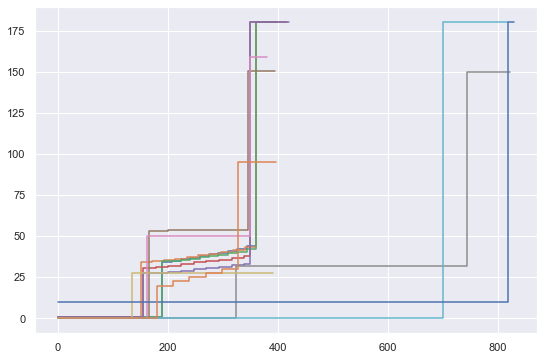

In [57]:
plt.figure().set_size_inches(9,6) 

date = '2020-8-15'
hour = 18

for unit in unit_list:
    plot_bid_curve(df_units[df_units['Unit']==unit], date, hour)

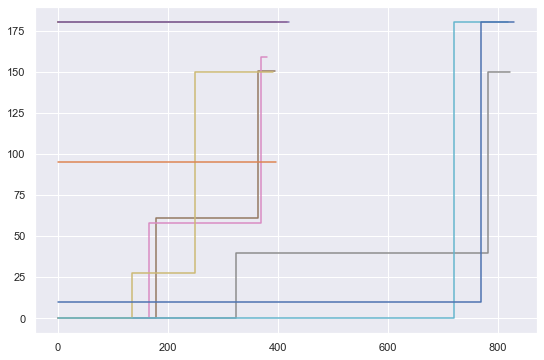

In [61]:
plt.figure().set_size_inches(9,6) 

date = '2020-8-15'
hour = 1

for unit in unit_list:
    plot_bid_curve(df_units[df_units['Unit']==unit], date, hour)

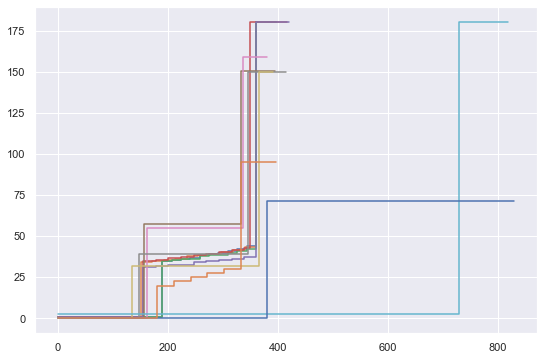

In [65]:
plt.figure().set_size_inches(9,6) 

date = '2020-9-10'
hour = 16

for unit in unit_list:
    plot_bid_curve(df_units[df_units['Unit']==unit], date, hour)

#### CREATING A DATAFRAME WITH ALL THE BLOCKS OF ALL THE UNITS SORTED BY ASCENDING PRICE

In [71]:
date = '2020-8-15'
hour = 18

df_plot_all = df_units[(df_units['Date']==date) & (df_units['Period']==hour)]

df_plot_all.sort_values('Price', inplace=True)
df_plot_all.reset_index(drop=True, inplace=True)

#Creating the variable cumulative sum of block energy to plot the curve
df_plot_all['Energy_tot'] = df_plot_all['Energy'].cumsum()

<ipython-input-71-9254753e595d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot_all.sort_values('Price', inplace=True)
<ipython-input-71-9254753e595d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot_all['Energy_tot'] = df_plot_all['Energy'].cumsum()


Plotting the bids for all the units considered, sorted by price, together with  the marginal price.

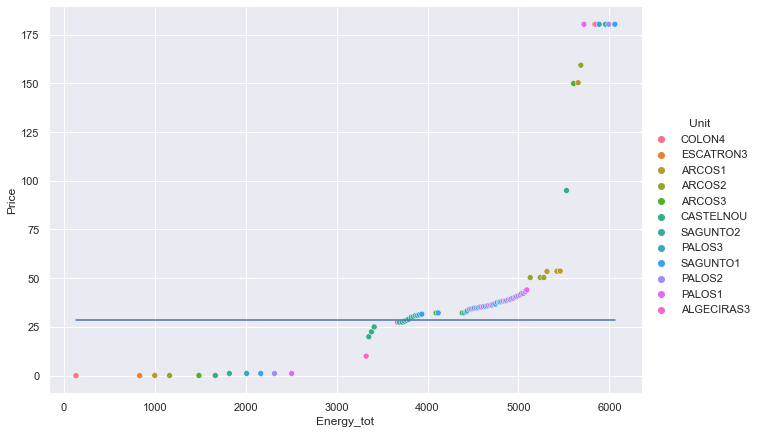

In [72]:
sns.relplot(data=df_plot_all, x='Energy_tot', y='Price', hue='Unit', height=6, aspect=1.5)

plt.plot(df_plot_all['Energy_tot'], df_plot_all['Marg_Price']);

In this example, it can be seen that most of the units offered energy at higher price that the final one, so most of them could not sell electricity in this auction.

In the following example, a zoom plot of the bid prices that are closed to the marginal price.

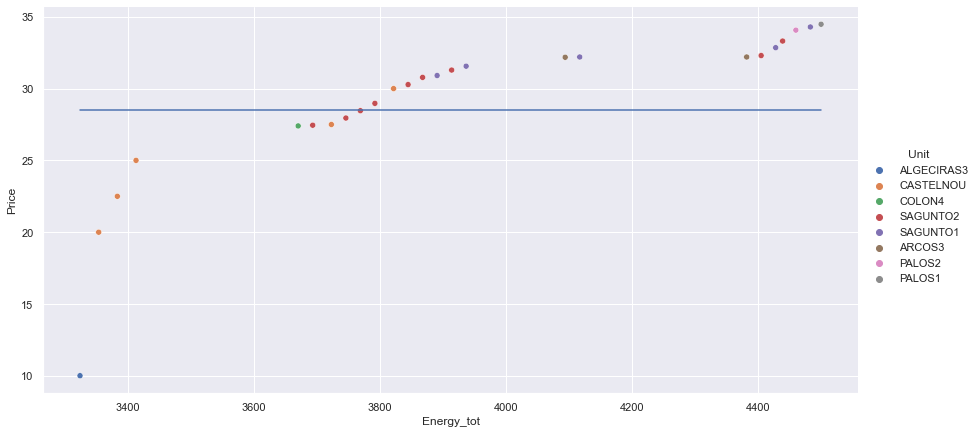

In [74]:
lim_min = 2700
lim_max = 4500

df_plot_all_sub = df_plot_all[(df_plot_all['Energy_tot'] > lim_min) &
                              (df_plot_all['Energy_tot'] < lim_max)]

sns.relplot(data=df_plot_all_sub, x='Energy_tot', y='Price', hue='Unit', height=6, aspect=2)

plt.plot(df_plot_all_sub['Energy_tot'], df_plot_all_sub['Marg_Price']);

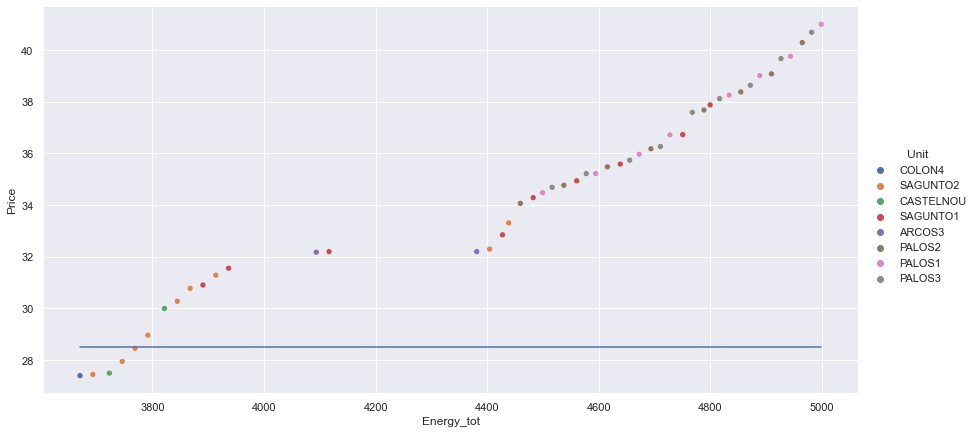

In [76]:
lim_min = 3600
lim_max = 5000

df_plot_all_sub = df_plot_all[(df_plot_all['Energy_tot'] > lim_min) &
                              (df_plot_all['Energy_tot'] < lim_max)]

sns.relplot(data=df_plot_all_sub, x='Energy_tot', y='Price', hue='Unit', height=6, aspect=2);

plt.plot(df_plot_all_sub['Energy_tot'], df_plot_all_sub['Marg_Price']);

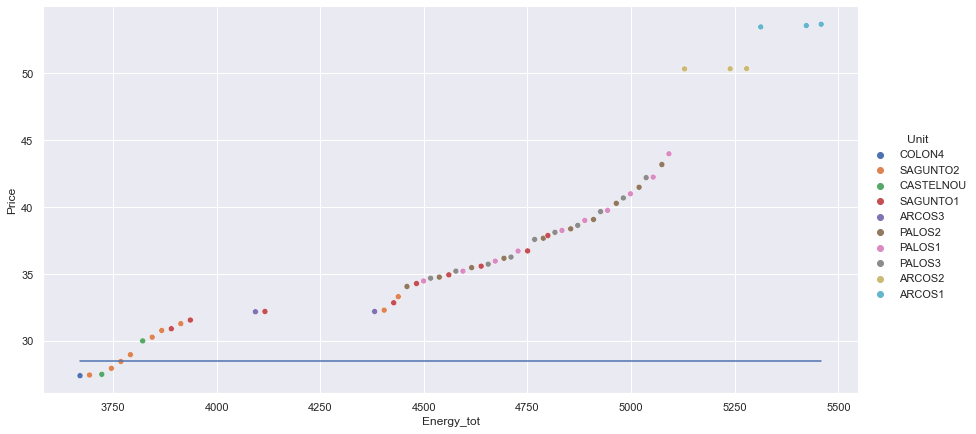

In [78]:
lim_min = 3600
lim_max = 5500

df_plot_all_sub = df_plot_all[(df_plot_all['Energy_tot'] > lim_min) &
                              (df_plot_all['Energy_tot'] < lim_max)]

sns.relplot(data=df_plot_all_sub, x='Energy_tot', y='Price', hue='Unit', height=6, aspect=2);

plt.plot(df_plot_all_sub['Energy_tot'], df_plot_all_sub['Marg_Price']);

In [47]:
df_plot_all[df_plot_all['Unit'] == 'ESCATRON3']

,Pot_max,Year,Month,Day,Period,Block,Price,Energy,Date,Weekday,Energy_tot,Unit,Marg_Price
4,818.00,2020,8,31,18,1,0.01,390.00,2020-08-31,Monday,"1,259.40",ESCATRON3,44.88
75,818.00,2020,8,31,18,2,67.30,428.00,2020-08-31,Monday,"5,573.90",ESCATRON3,44.88


In [48]:
df_plot_all[df_plot_all['Unit'] == 'ALGECIRAS3']

,Pot_max,Year,Month,Day,Period,Block,Price,Energy,Date,Weekday,Energy_tot,Unit,Marg_Price
3,830.10,2020,8,31,18,1,0.01,408.00,2020-08-31,Monday,869.40,ALGECIRAS3,44.88
66,830.10,2020,8,31,18,2,51.30,422.10,2020-08-31,Monday,"4,752.70",ALGECIRAS3,44.88


In [49]:
df_plot_all_sub.head()

,Pot_max,Year,Month,Day,Period,Block,Price,Energy,Date,Weekday,Energy_tot,Unit,Marg_Price
30,822.90,2020,8,31,18,3,33.93,254.90,2020-08-31,Monday,"3,677.60",ARCOS3,44.88
31,395.60,2020,8,31,18,2,34.60,21.00,2020-08-31,Monday,"3,698.60",PALOS2,44.88
32,417.30,2020,8,31,18,6,34.87,23.00,2020-08-31,Monday,"3,721.60",SAGUNTO1,44.88
33,394.10,2020,8,31,18,2,35.02,17.00,2020-08-31,Monday,"3,738.60",PALOS1,44.88
34,397.80,2020,8,31,18,2,35.24,17.00,2020-08-31,Monday,"3,755.60",PALOS3,44.88


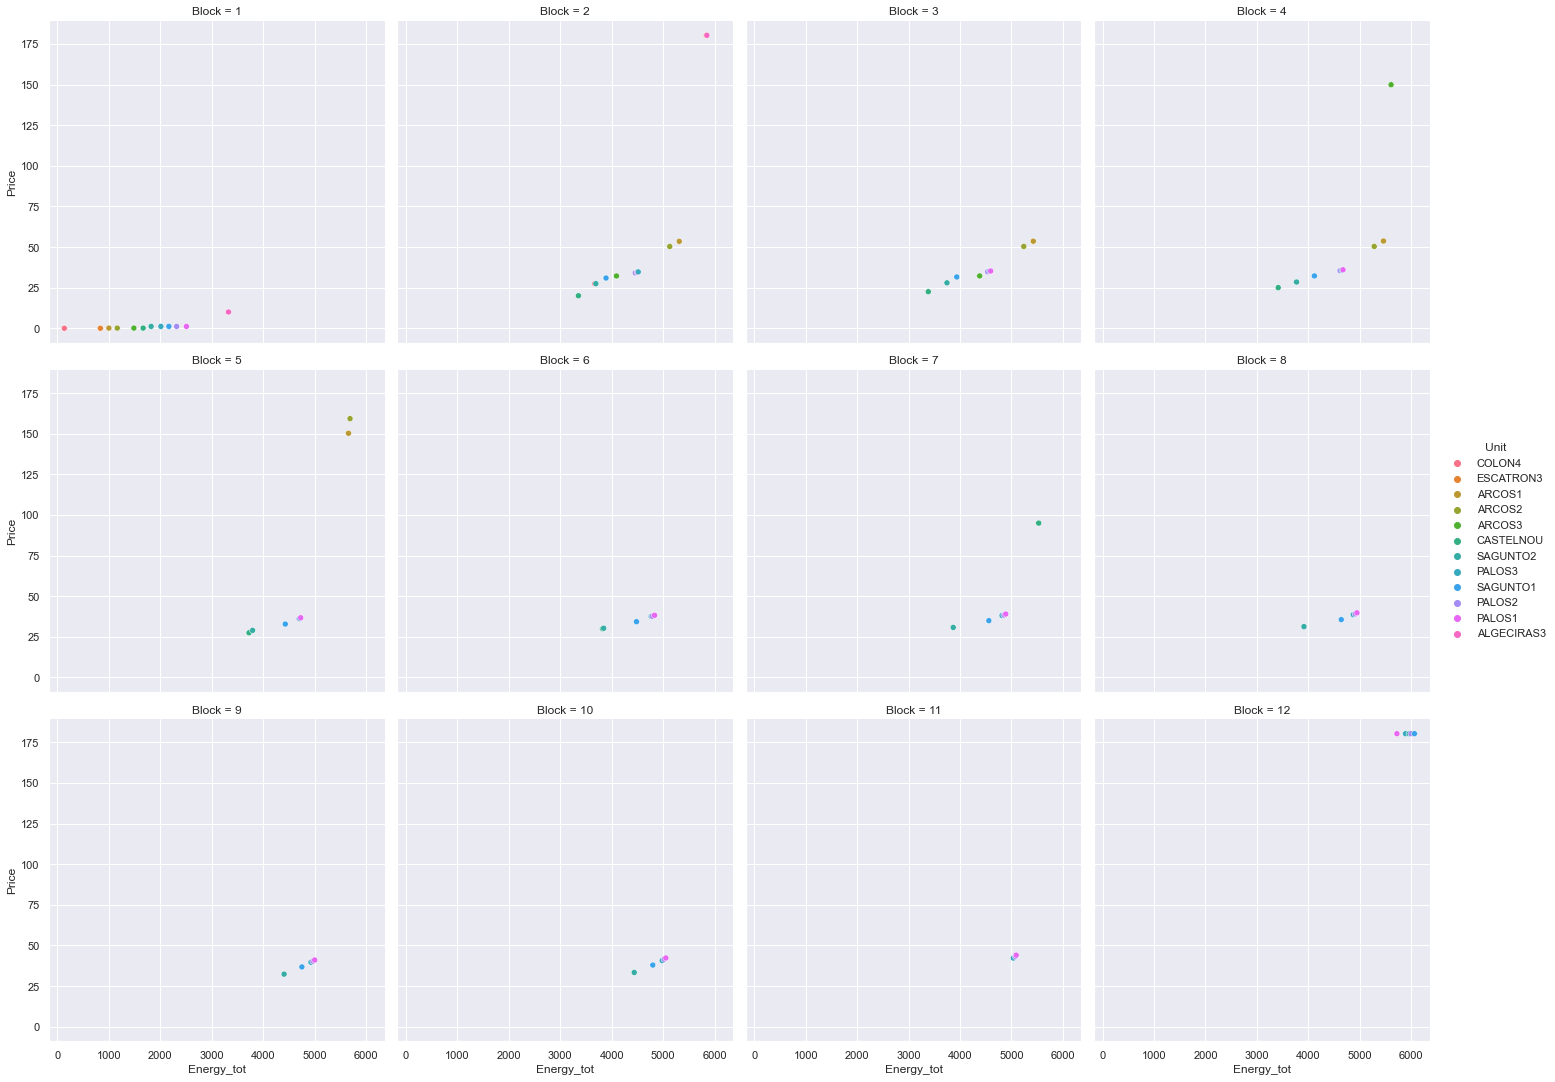

In [79]:
sns.relplot(data=df_plot_all, x='Energy_tot', y='Price', hue='Unit', col='Block', col_wrap=4);

<ipython-input-80-655e74e85df7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot_all.sort_values('Price', inplace=True)
<ipython-input-80-655e74e85df7>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot_all['Energy_tot'] = df_plot_all['Energy'].cumsum()


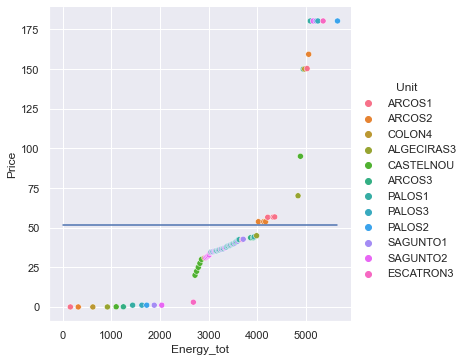

In [80]:
date = '2020-09-15'
hour = 24

df_plot_all = df_units[(df_units['Date']==date) &
         (df_units['Period']==hour)]

df_plot_all.sort_values('Price', inplace=True)
df_plot_all.reset_index(drop=True, inplace=True)
df_plot_all['Energy_tot'] = df_plot_all['Energy'].cumsum()

sns.relplot(data=df_plot_all, x='Energy_tot', y='Price', hue='Unit')

plt.plot(pd.Series(0).append(df_plot_all['Energy_tot']), 
                    pd.Series(df_plot_all['Marg_Price'].iloc[0]).append(df_plot_all['Marg_Price']), 
                    drawstyle='steps', 
                    label='steps (=steps-pre)')

<ipython-input-81-9c8eda7e49d3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot_all.sort_values('Price', inplace=True)
<ipython-input-81-9c8eda7e49d3>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot_all['Energy_tot'] = df_plot_all['Energy'].cumsum()


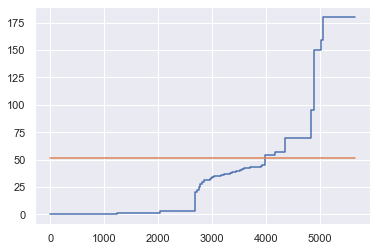

In [81]:
date = '2020-09-15'
hour = 24

df_plot_all = df_units[(df_units['Date']==date) &
         (df_units['Period']==hour)]

df_plot_all.sort_values('Price', inplace=True)
df_plot_all.reset_index(drop=True, inplace=True)
df_plot_all['Energy_tot'] = df_plot_all['Energy'].cumsum()

plt.plot(pd.Series(0).append(df_plot_all['Energy_tot']), 
                    pd.Series(df_plot_all['Price'].iloc[0]).append(df_plot_all['Price']), 
                    drawstyle='steps', 
                    label='steps (=steps-pre)')

plt.plot(pd.Series(0).append(df_plot_all['Energy_tot']), 
                    pd.Series(df_plot_all['Marg_Price'].iloc[0]).append(df_plot_all['Marg_Price']), 
                    drawstyle='steps', 
                    label='steps (=steps-pre)')

In [82]:
date = '2020-09-15'
hour = 24

df_plot_all = df_units[(df_units['Date']==date) &
         (df_units['Period']==hour)]

df_plot_all.sort_values('Price', inplace=True)
df_plot_all.reset_index(drop=True, inplace=True)
df_plot_all['delta_Marg_Price'] = df_plot_all['Marg_Price'] - df_plot_all['Price']
df_plot_all_sel = df_plot_all[df_plot_all['delta_Marg_Price']>= 0]

df_plot_all_sel = df_plot_all_sel.merge(df_plot_all_sel.groupby(['Unit'])[['Block']].max().reset_index(),how='inner')
df_plot_all_sel['Energy_tot_all'] = df_plot_all_sel['Energy_tot'].cumsum()
df_plot_all_sel['Energy_unit_ratio'] = df_plot_all_sel['Energy_tot'] / df_plot_all_sel['Pot_max']

df_plot_all_sel

<ipython-input-82-d8a0fa734d49>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot_all.sort_values('Price', inplace=True)
<ipython-input-82-d8a0fa734d49>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot_all['delta_Marg_Price'] = df_plot_all['Marg_Price'] - df_plot_all['Price']


,Pot_max,Year,Month,Day,Period,Block,Price,Energy,Date,Weekday,Energy_tot,Unit,Marg_Price,delta_Marg_Price,Energy_tot_all,Energy_unit_ratio
0,395.60,2020,9,15,24,1,0.00,156.00,2020-09-15,Tuesday,156.00,ARCOS1,51.51,51.51,156.00,0.39
1,379.40,2020,9,15,24,1,0.00,162.00,2020-09-15,Tuesday,162.00,ARCOS2,51.51,51.51,318.00,0.43
2,395.60,2020,9,15,24,1,1.13,100.00,2020-09-15,Tuesday,100.00,PALOS2,51.51,50.38,418.00,0.25
3,797.80,2020,9,15,24,6,30.00,33.60,2020-09-15,Tuesday,348.00,CASTELNOU,51.51,21.51,766.00,0.44
4,392.00,2020,9,15,24,2,30.97,65.00,2020-09-15,Tuesday,365.00,COLON4,51.51,20.54,"1,131.00",0.93
5,419.60,2020,9,15,24,10,37.49,21.00,2020-09-15,Tuesday,360.00,SAGUNTO2,51.51,14.02,"1,491.00",0.86
6,397.80,2020,9,15,24,11,42.41,17.00,2020-09-15,Tuesday,360.00,PALOS3,51.51,9.10,"1,851.00",0.90
7,818.00,2020,9,15,24,2,42.47,60.00,2020-09-15,Tuesday,710.00,ESCATRON3,51.51,9.04,"2,561.00",0.87
8,417.30,2020,9,15,24,10,42.71,21.00,2020-09-15,Tuesday,360.00,SAGUNTO1,51.51,8.80,"2,921.00",0.86
9,822.90,2020,9,15,24,3,43.67,55.40,2020-09-15,Tuesday,355.40,ARCOS3,51.51,7.84,"3,276.40",0.43


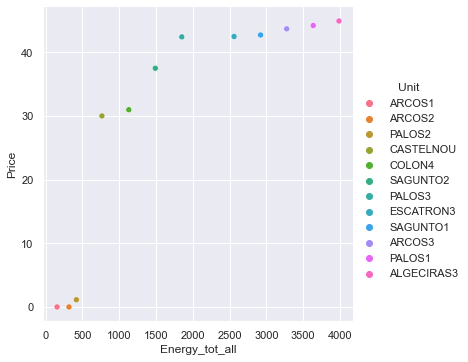

In [83]:
sns.relplot(data=df_plot_all_sel, x='Energy_tot_all', y='Price', hue='Unit')

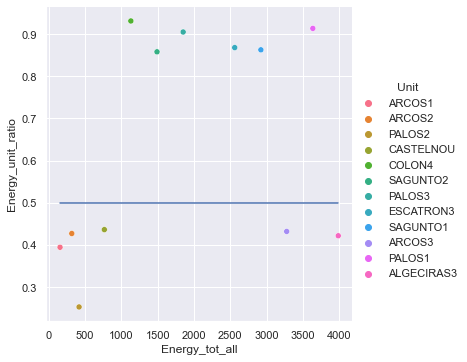

In [84]:
sns.relplot(data=df_plot_all_sel, x='Energy_tot_all', y='Energy_unit_ratio', hue='Unit');
plt.plot(df_plot_all_sel['Energy_tot_all'],[.5]*df_plot_all_sel.shape[0]);

### HYDRAULIC PLANTS

In [85]:
date = '2020-10-31'
hour = 18

df_plot_hyd_all = df_units_hyd[(df_units_hyd['Date']==date) &
         (df_units_hyd['Period']==hour)]

df_plot_hyd_all.sort_values('Price', inplace=True)
df_plot_hyd_all.reset_index(drop=True, inplace=True)
df_plot_hyd_all['Energy_tot'] = df_plot_hyd_all['Energy'].cumsum()

<ipython-input-85-a0a8b35ea3fc>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot_hyd_all.sort_values('Price', inplace=True)
<ipython-input-85-a0a8b35ea3fc>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot_hyd_all['Energy_tot'] = df_plot_hyd_all['Energy'].cumsum()


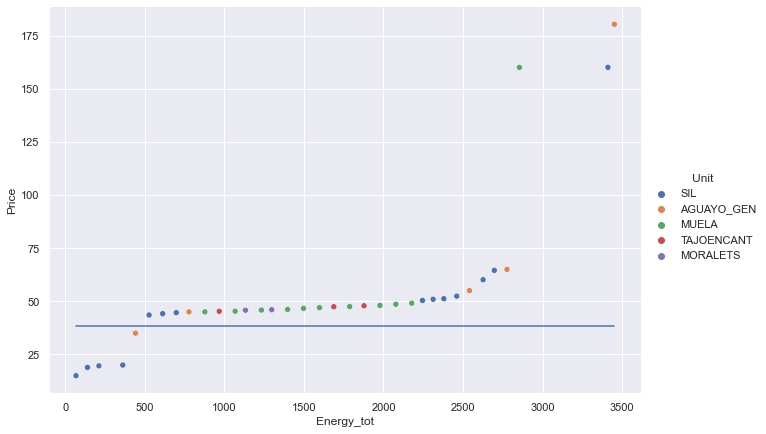

In [86]:
sns.relplot(data=df_plot_hyd_all, x='Energy_tot', y='Price', hue='Unit', height=6, aspect=1.5);

plt.plot(df_plot_hyd_all['Energy_tot'], df_plot_hyd_all['Marg_Price']);

<ipython-input-87-26d081ea0dc1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot_hyd_all.sort_values('Price', inplace=True)
<ipython-input-87-26d081ea0dc1>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot_hyd_all['Energy_tot'] = df_plot_hyd_all['Energy'].cumsum()


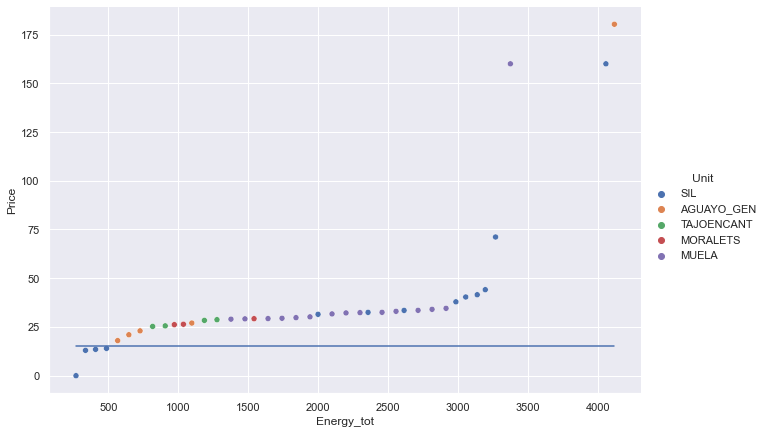

In [87]:
date = '2020-03-30'
hour = 18

df_plot_hyd_all = df_units_hyd[(df_units_hyd['Date']==date) &
         (df_units_hyd['Period']==hour)]

df_plot_hyd_all.sort_values('Price', inplace=True)
df_plot_hyd_all.reset_index(drop=True, inplace=True)
df_plot_hyd_all['Energy_tot'] = df_plot_hyd_all['Energy'].cumsum()

sns.relplot(data=df_plot_hyd_all, x='Energy_tot', y='Price', hue='Unit', height=6, aspect=1.5);

plt.plot(df_plot_hyd_all['Energy_tot'], df_plot_hyd_all['Marg_Price']);

<ipython-input-88-017c862131b6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot_hyd_all.sort_values('Price', inplace=True)
<ipython-input-88-017c862131b6>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot_hyd_all['Energy_tot'] = df_plot_hyd_all['Energy'].cumsum()


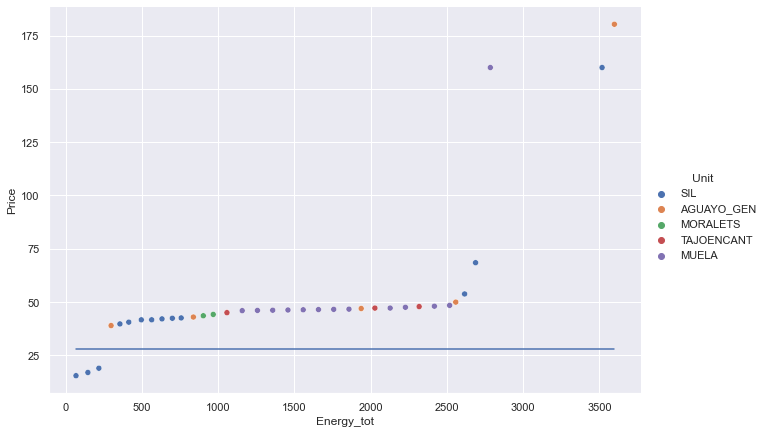

In [88]:
date = '2020-08-16'
hour = 18

df_plot_hyd_all = df_units_hyd[(df_units_hyd['Date']==date) &
         (df_units_hyd['Period']==hour)]

df_plot_hyd_all.sort_values('Price', inplace=True)
df_plot_hyd_all.reset_index(drop=True, inplace=True)
df_plot_hyd_all['Energy_tot'] = df_plot_hyd_all['Energy'].cumsum()

sns.relplot(data=df_plot_hyd_all, x='Energy_tot', y='Price', hue='Unit', height=6, aspect=1.5);

plt.plot(df_plot_hyd_all['Energy_tot'], df_plot_hyd_all['Marg_Price']);